In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('C:\\Users\\g7gay\\OneDrive\\Desktop\\Projects\\Car_Price_Prediction\\car data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
# checking the distribution of categorical values

print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


ENCODING CATEGORICAL DATA

In [11]:
data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
data.replace({'Seller_Type':{'Dealer':0,'Individual':1}}, inplace=True)
data.replace({'Transmission':{'Manual':1,'Automatic':1}}, inplace = True)

In [12]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,1,0
1,sx4,2013,4.75,9.54,43000,1,0,1,0
2,ciaz,2017,7.25,9.85,6900,0,0,1,0
3,wagon r,2011,2.85,4.15,5200,0,0,1,0
4,swift,2014,4.60,6.87,42450,1,0,1,0


In [14]:
x = data.drop(columns=['Car_Name', 'Selling_Price'], axis =1)
y = data['Selling_Price']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.1, random_state=2)

MODEL TRAINING

In [16]:
lrmodel = LinearRegression()

In [17]:
lrmodel.fit(x_train, y_train)

LinearRegression()

MODEL EVALUATION

In [18]:
# predicting on training data

training_data_prediction = lrmodel.predict(x_train)

# R squared Error

error_score = metrics.r2_score(y_train,training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8719637171352994


Text(0.5, 1.0, 'Actual price vs predicted price')

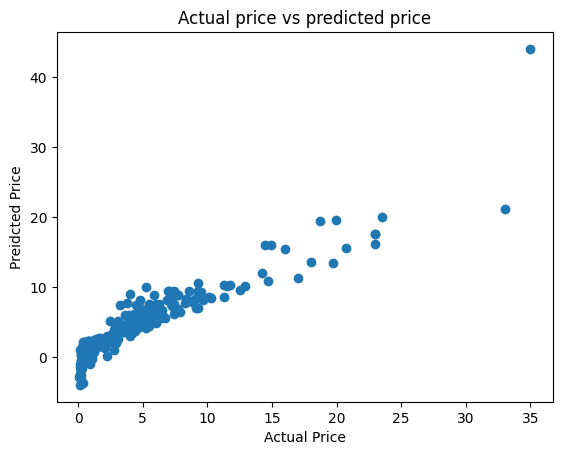

In [20]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Preidcted Price")
plt.title("Actual price vs predicted price")

In [21]:
# predicting on testing data

testing_data_prediction = lrmodel.predict(x_test)

# R squared Error

error_score = metrics.r2_score(y_test,testing_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8340585167699703


Text(0.5, 1.0, 'Actual price vs predicted price')

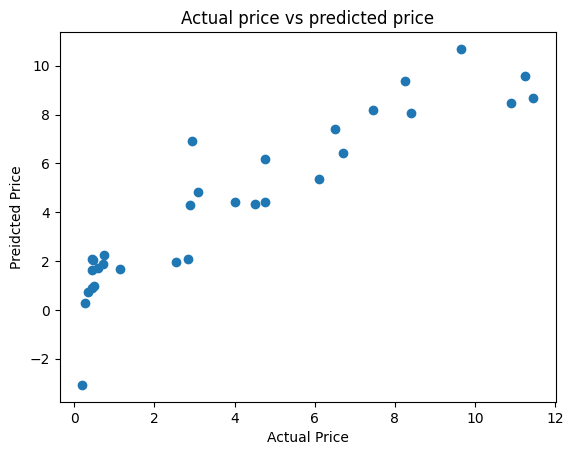

In [22]:
plt.scatter(y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Preidcted Price")
plt.title("Actual price vs predicted price")

LASSO REGRESSION

In [23]:
model = Lasso()

In [24]:
model.fit(x_train, y_train)

Lasso()

In [25]:
# predicting on training data

training_data_prediction = model.predict(x_train)

# R squared Error

error_score = metrics.r2_score(y_train,training_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8427856123435794


Text(0.5, 1.0, 'Actual price vs predicted price')

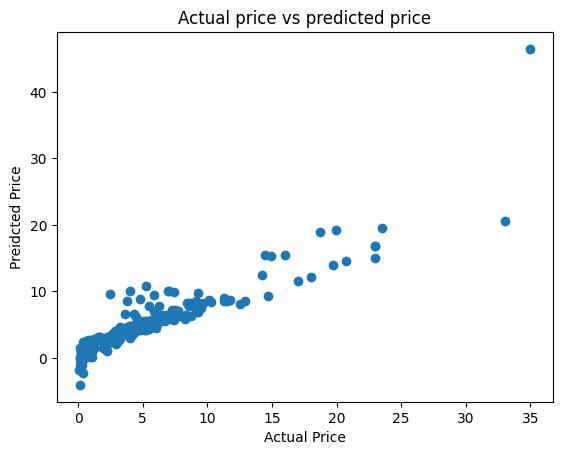

In [26]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Preidcted Price")
plt.title("Actual price vs predicted price")

In [27]:
# predicting on testing data

testing_data_prediction = model.predict(x_test)

# R squared Error

error_score = metrics.r2_score(y_test,testing_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8709167941173195


Text(0.5, 1.0, 'Actual price vs predicted price')

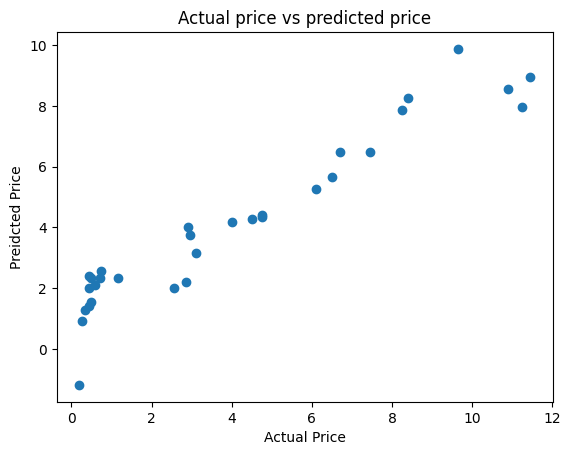

In [28]:
plt.scatter(y_test, testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Preidcted Price")
plt.title("Actual price vs predicted price")